# 1. Install Dependencies and Setup

In [1]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\harsh\AppData\Local\Temp\pip-install-3h7njg79\tensorflow-gpu_bf780a4796b64f74816913ada34a60ad\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-e

In [2]:
pip uninstall tensorflow-gpu tensorflow-intel

^C
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install Augmentor

In [4]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: opencv-python in d:\anaconda\lib\site-packages (4.8.0.76)



# 2. Remove dodgy images

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data' 

In [73]:
import Augmentor

# Loop through all 15 folders
for i in range(1, 16):
    # Define the path using raw string literals
    path = r'E:\Research\data\train' + str(i) + '\\'
    
    # Create an Augmentor pipeline for image augmentation
    p = Augmentor.Pipeline(path)
    
    # Add augmentation operations as needed
    p.zoom(probability=0.6, min_factor=0.75, max_factor=1)
    p.flip_top_bottom(probability=0.5)
    p.flip_left_right(probability=0.5)
    p.rotate(probability=1, max_left_rotation=25, max_right_rotation=25)
    p.rotate_random_90(probability=1)
    p.random_brightness(probability=0.5, min_factor=0.4, max_factor=0.9)
    p.random_distortion(probability=0.5, grid_width=7, grid_height=8, magnitude=9)
    p.random_erasing(probability=0.3, rectangle_area=0.2)
    
    # Sample the augmented images (generate 15,000 augmented images for each folder)
    p.sample(15000)

OSError: The source directory you specified does not exist.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the root directory containing subfolders for each image class
data_dir = 'E:\Research\data'
batch_size = 32
image_size = (224, 224)  # Adjust the size as needed

# Use the ImageDataGenerator to load and preprocess images
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Split the data into training and validation sets
)

# Create a training dataset
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training',  # Specify 'training' to create the training dataset
    shuffle=True,  # Shuffle the data
)

# Create a validation dataset
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='validation',  # Specify 'validation' to create the validation dataset
    shuffle=False,  # Do not shuffle the validation data
)

# Optionally, you can create a test dataset in a similar way
# test_data = datagen.flow_from_directory(
#     'test_data_dir',
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='categorical',  # Use 'categorical' for multi-class classification
#     shuffle=False,  # Do not shuffle the test data
# )

# You can now use train_data and val_data for training and validation in your machine learning model.


Found 52896 images belonging to 2 classes.
Found 13224 images belonging to 2 classes.


In [7]:
pip install Augmentor

In [10]:
import Augmentor
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

data_dir = 'E:\Research\data'  
batch_size = 32
image_size = (224, 224)  

for i in range(1, 16):
    class_path = os.path.join(data_dir, 'train' + str(i))
    
    p = Augmentor.Pipeline(class_path)
    
    p.zoom(probability=0.6, min_factor=0.75, max_factor=1)
    p.flip_top_bottom(probability=0.5)
    p.flip_left_right(probability=0.5)
    p.rotate(probability=1, max_left_rotation=25, max_right_rotation=25)
    p.rotate_random_90(probability=1)
    p.random_brightness(probability=0.5, min_factor=0.4, max_factor=0.9)
    p.random_distortion(probability=0.5, grid_width=7, grid_height=8, magnitude=9)
    p.random_erasing(probability=0.3, rectangle_area=0.2)
    
    p.sample(15000)

datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Split the data into training and validation sets
)

# Create a training dataset
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='training',  # Specify 'training' to create the training dataset
    shuffle=True,  # Shuffle the data
)

# Create a validation dataset
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    subset='validation',  # Specify 'validation' to create the validation dataset
    shuffle=False,  # Do not shuffle the validation data
)

# Optionally, you can create a test dataset in a similar way
# test_data = datagen.flow_from_directory(
#     'test_data_dir',
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='categorical',  # Use 'categorical' for multi-class classification
#     shuffle=False,  # Do not shuffle the test data
# )

# You can now use train_data and val_data for training and validation in your machine learning model.


OSError: The source directory you specified does not exist.

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [74]:
import os
import cv2
import imghdr

data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

# Iterate through all subfolders in the data directory
for root, dirs, files in os.walk(data_dir):
    for image in files:
        image_path = os.path.join(root, image)
        
        try:
            img = cv2.imread(image_path)
            
            if img is not None:
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in ext list: {}'.format(image_path))
                    os.remove(image_path)
            else:
                print('Failed to read image: {}'.format(image_path))
                # Handle the case where the image could not be read
        except Exception as e:
            print('Issue with image: {}'.format(image_path))
            

# 3. Load Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 66120 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [64]:
batch = data_iterator.next()

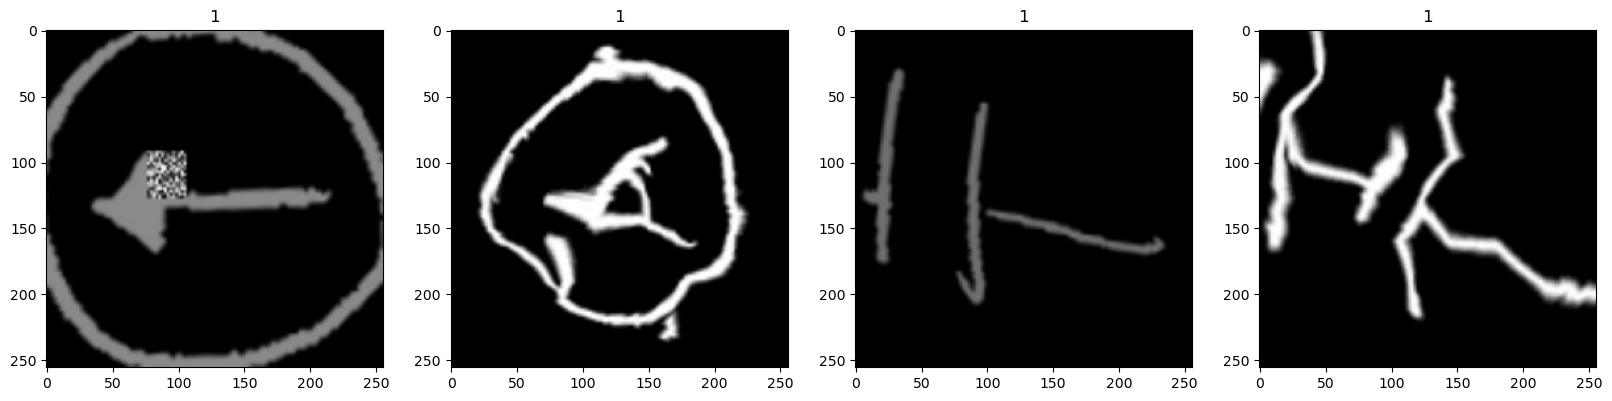

In [65]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

# 5. Split Data

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size

1446

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [20]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [48]:
# Save the model to a file
model.save('my_model.h5')

d:\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Define the model file name
model_file_name = 'my_model.h5'

# Create the full path to the model file
model_path = os.path.join(current_directory, model_file_name)

# Display the full path
print(f"Full path to the model file: {model_path}")

Full path to the model file: e:\Research\my_model.h5


In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [26]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])  

Epoch 1/10
1446/1446 [==============================] - 2148s 1s/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9989
Epoch 2/10
1446/1446 [==============================] - 1065s 736ms/step - loss: 9.0542e-04 - accuracy: 0.9998 - val_loss: 0.0046 - val_accuracy: 0.9986
Epoch 3/10
1446/1446 [==============================] - 1087s 752ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 4/10
1446/1446 [==============================] - 1071s 740ms/step - loss: 1.4610e-04 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 0.9990
Epoch 5/10
1446/1446 [==============================] - 1072s 741ms/step - loss: 3.7854e-05 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 0.9993
Epoch 6/10
1446/1446 [==============================] - 1075s 743ms/step - loss: 8.2663e-04 - accuracy: 0.9998 - val_loss: 0.0086 - val_accuracy: 0.9988
Epoch 7/10
1446/1446 [==============================] - 1098s 759ms/step - loss: 5.3797e-04 -

# 8. Plot Performance

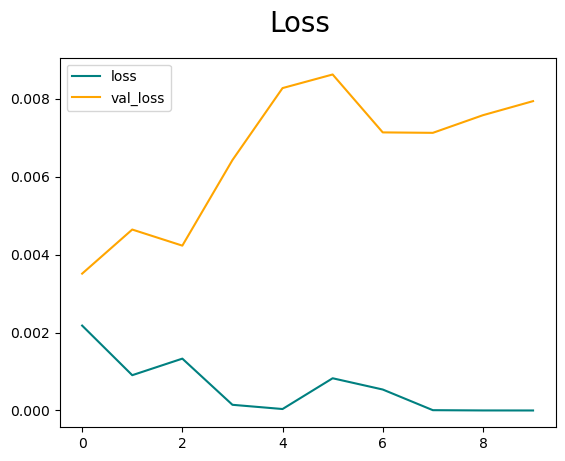

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

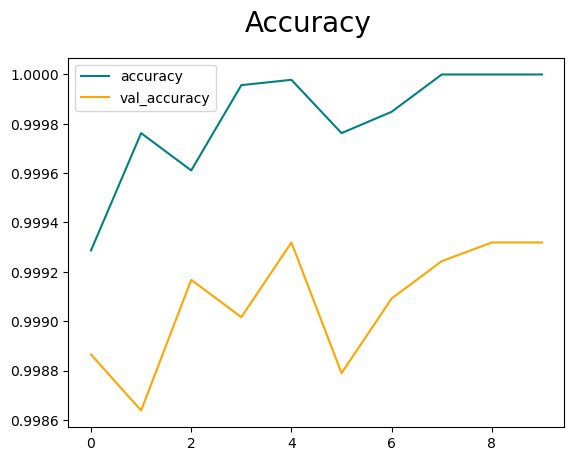

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 226ms/step


In [39]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9996933, shape=(), dtype=float32) tf.Tensor(0.99954, shape=(), dtype=float32) tf.Tensor(0.99924153, shape=(), dtype=float32)


# 10. Test

In [40]:
import cv2

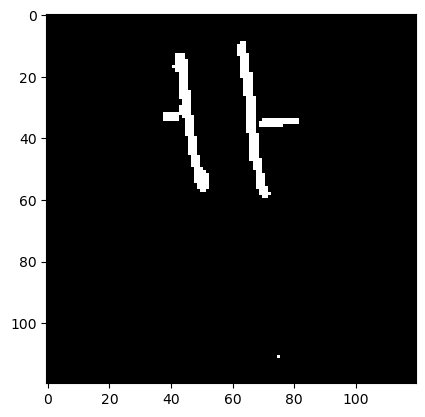

In [43]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'E:\\Research\\data\\test\\4\\15.bmp'
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is not None:
    # Convert the image from BGR to RGB format
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.show()
else:
    print(f"Failed to load the image at path: {image_path}")

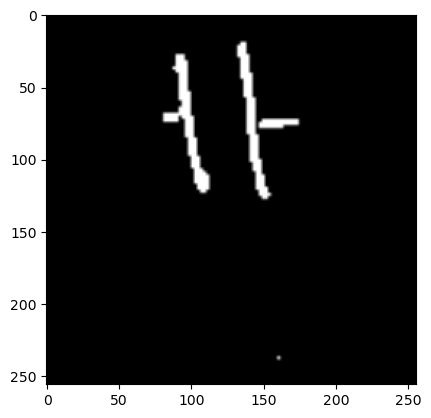

In [44]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = 'E:\\Research\\data\\test\\4\\15.bmp'
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is not None:
    # Resize the image using TensorFlow
    resize = tf.image.resize(img, (256, 256))
    
    # Convert the resized image to NumPy array and cast it to int for display
    resized_image = resize.numpy().astype(int)
    
    # Display the resized image
    plt.imshow(resized_image)
    plt.show()
else:
    print(f"Failed to load the image at path: {image_path}")

In [45]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 2s 2s/step


In [46]:
yhat

array([[0.99999136]], dtype=float32)

In [63]:
import os
import cv2
import numpy as np
import tensorflow as tf

# Load your trained model
model_path = 'e:\\Research\\my_model.h5'  # Replace with your model path
model = tf.keras.models.load_model(model_path)

# Define the path to the folder containing BMP images for prediction
folder_path = 'E:\\Research\\data\\test'  # Updated to the correct path

# Define the image size expected by your model
image_size = (256, 256)

# Create a list of folder names from 1 to 15
folder_names = [str(i) for i in range(1, 16)]

# Function to check if a file has a .bmp extension
def is_bmp_file(filename):
    return filename.lower().endswith('.bmp')

# Iterate through the images in the folder
for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)
    
    # Check if the file is a BMP image
    if is_bmp_file(filename):
        # Load the BMP image with error handling
        img = cv2.imread(image_path)
        
        if img is not None:
            # Resize and preprocess the image
            img = cv2.resize(img, image_size)
            img = img / 255.0  # Normalize pixel values to [0, 1]
            img = np.expand_dims(img, axis=0)  # Add batch dimension
            
            # Make a prediction using the model
            predictions = model.predict(img)
            
            # Get the predicted folder number as the index of the highest probability
            predicted_folder_index = np.argmax(predictions)
            
            # Get the predicted folder name
            predicted_folder_name = folder_names[predicted_folder_index]
            
            # Display the predicted folder number and name
            print(f'Image {filename}: Predicted folder number is {predicted_folder_name}')
            print(f'Predictions: {predictions}')
        else:
            print(f'Failed to load image {filename}')
    else:
        print(f'Skipping non-BMP file: {filename}')


Skipping non-BMP file: 1
Skipping non-BMP file: 10
Skipping non-BMP file: 11
Skipping non-BMP file: 12
Skipping non-BMP file: 13
Skipping non-BMP file: 14
Skipping non-BMP file: 15
Skipping non-BMP file: 2
Skipping non-BMP file: 3
Skipping non-BMP file: 4
Skipping non-BMP file: 5
Skipping non-BMP file: 6
Skipping non-BMP file: 7
Skipping non-BMP file: 8
Skipping non-BMP file: 9


# 11. Save the Model

In [58]:
from tensorflow.keras.models import load_model

In [59]:
model.save(os.path.join('models','imageclassifier.h5'))

d:\anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
new_model = load_model('e:\\Research\\my_model.h5')

In [62]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 297ms/step


array([[0.99999136]], dtype=float32)